In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# kernel smoothing function
def kernel(point, xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))

    for j in range(m):
        diff = point - X[j]
        weights[j, j] = np.exp(diff * diff.T / (-2.0 * k**2))

    return weights

In [21]:
# function to return local weight of eah traiining example
def localWeight(point, xmat, ymat, k):
    wt = kernel(point, xmat, k)
    W = (X.T * (wt*X)).I * (X.T * wt * ymat.T)
    return W

In [22]:
# root function that drives the algorithm
def localWeightRegression(xmat, ymat, k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)

    for i in range(m):
        ypred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, k)

    return ypred

In [23]:
df = pd.read_csv('tips.csv - tips.csv')
print(df)

     total_bill   tip  gender smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
5         25.29  4.71    Male     No   Sun  Dinner     4
6          8.77  2.00    Male     No   Sun  Dinner     2
7         26.88  3.12    Male     No   Sun  Dinner     4
8         15.04  1.96    Male     No   Sun  Dinner     2
9         14.78  3.23    Male     No   Sun  Dinner     2
10        10.27  1.71    Male     No   Sun  Dinner     2
11        35.26  5.00  Female     No   Sun  Dinner     4
12        15.42  1.57    Male     No   Sun  Dinner     2
13        18.43  3.00    Male     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
15        21.58  3.92    Male     No   Sun  Dinner     2
16        10.33  1.67  Female  

In [24]:
df.shape

(244, 7)

In [25]:
bill = np.array(df.total_bill)
tip = np.array(df.tip)

In [26]:
mbill=np.mat(bill)
mtip=np.mat(tip)


In [27]:
print(mbill)


[[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
  15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
  19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
  16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
  28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
  20.29 13.81 11.02 18.29 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07
  26.86 25.28 14.73 10.51 17.92 27.2  22.76 17.29 19.44 16.66 10.07 32.68
  15.98 34.83 13.03 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17
  27.28 12.03 21.01 12.46 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21
  18.24 14.31 14.    7.25 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08
  11.69 13.42 14.26 15.95 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27
  11.17 12.26 18.26  8.51 10.33 14.15 16.   13.16 17.47 34.3  41.19 27.05
  16.43  8.35 18.64 11.87  9.78  7.51 14.07 13.13 17.26 24.55 19.77 29.85
  48.17 25.   13.39 16.49 21.5  12.66 1

In [28]:
print(mtip)

[[ 1.01  1.66  3.5   3.31  3.61  4.71  2.    3.12  1.96  3.23  1.71  5.
   1.57  3.    3.02  3.92  1.67  3.71  3.5   3.35  4.08  2.75  2.23  7.58
   3.18  2.34  2.    2.    4.3   3.    1.45  2.5   3.    2.45  3.27  3.6
   2.    3.07  2.31  5.    2.24  2.54  3.06  1.32  5.6   3.    5.    6.
   2.05  3.    2.5   2.6   5.2   1.56  4.34  3.51  3.    1.5   1.76  6.73
   3.21  2.    1.98  3.76  2.64  3.15  2.47  1.    2.01  2.09  1.97  3.
   3.14  5.    2.2   1.25  3.08  4.    3.    2.71  3.    3.4   1.83  5.
   2.03  5.17  2.    4.    5.85  3.    3.    3.5   1.    4.3   3.25  4.73
   4.    1.5   3.    1.5   2.5   3.    2.5   3.48  4.08  1.64  4.06  4.29
   3.76  4.    3.    1.    4.    2.55  4.    3.5   5.07  1.5   1.8   2.92
   2.31  1.68  2.5   2.    2.52  4.2   1.48  2.    2.    2.18  1.5   2.83
   1.5   2.    3.25  1.25  2.    2.    2.    2.75  3.5   6.7   5.    5.
   2.3   1.5   1.36  1.63  1.73  2.    2.5   2.    2.74  2.    2.    5.14
   5.    3.75  2.61  2.    3.5   2.5   2.    2.  

In [36]:
m = np.shape(mtip)[1]
one = np.ones((1, m), dtype = int)
# horizontal stacking
X = np.hstack((one.T, mbill.T))
print(X.shape)

(244, 2)


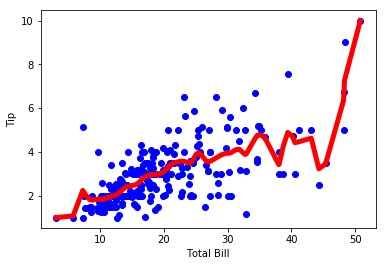

In [50]:
# predicting values using LWLR
ypred = localWeightRegression(X, mtip, 0.8)
# plotting the predicted graph
xsort = X.copy()
xsort.sort(axis=0)
plt.scatter(bill, tip, color='blue')
plt.plot(xsort[:, 1], ypred[X[:, 1].argsort(0)], color='red', linewidth=5)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()